# IRELAND DATASET

In [2]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from cmath import sqrt
import warnings
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import sklearn
#import folium
import warnings
#import pydotplus
import six
import sys
import statistics as st
#import functions as fn
#import cufflinks as cf

#cf.set_config_file(offline=True)

#prof.to_file(output_file='output.html')
sys.modules['sklearn.externals.six'] = six
warnings.filterwarnings('ignore')

# import ML packages
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestRegressor
#from explainerdashboard import RegressionExplainer, ExplainerDashboard

#for interactive analysis
from ipywidgets import interact

%matplotlib inline

# Descriptive Statistics for the Target feature: crop value

In [4]:
#Reading in df_irishdmodels cleaned dataset

df_irishdata = pd.read_csv('df_irishmodels.csv')



In [5]:
df_irishdata

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0
...,...,...,...,...,...,...,...,...
57655,57655,2020,Ireland,tonnes,Wheat,Production,364920.0,8262.0
57656,57656,2020,Ireland,tonnes,Wheat,Production,364920.0,2099.0
57657,57657,2020,Ireland,tonnes,Wheat,Production,364920.0,646.0
57658,57658,2020,Ireland,tonnes,Wheat,Production,364920.0,174.0


In [6]:
#inspect the dataframe for outliers will display the min,max mean and inner and outer quariles for all features
df_irishdata.describe()

,Unnamed: 0,Year,crop_value,import_export_value
count,57660.000000,57660.000000,5.766000e+04,57660.000000
mean,28829.500000,2018.649462,1.931997e+05,9073.481408
std,16645.152598,1.067478,4.719297e+05,20373.360680
min,0.000000,2017.000000,2.000000e+00,25.000000
25%,14414.750000,2018.000000,5.890000e+03,331.000000
50%,28829.500000,2019.000000,1.492495e+05,2099.000000
75%,43244.250000,2020.000000,1.492495e+05,8378.000000
max,57659.000000,2020.000000,3.920000e+06,157805.000000


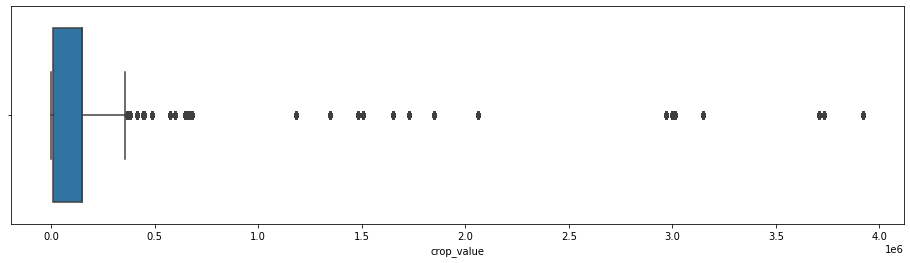

In [7]:
#boxplot for the target feature crop_value
plt.figure(figsize = (16,4))
sns.boxplot(x= df_irishdata['crop_value'])
plt.show()

In [8]:
#print the mean of the target feature
mean_cropvalue= df_irishdata['crop_value'].mean()
print(mean_cropvalue)

193199.6637651423


In [9]:
#print the median of the target feature
median = df_irishdata['crop_value'].median()
print(median)

149249.4953422438


In [10]:
#print the mode of the target feature
mode = df_irishdata['crop_value'].mode()
print(mode)

0    149249.495342
Name: crop_value, dtype: float64


[Text(0.5, 0, 'Crop Price'),
 Text(0, 0.5, 'Cropvalue'),
 Text(0.5, 1.0, 'Cropvalue Histogram')]

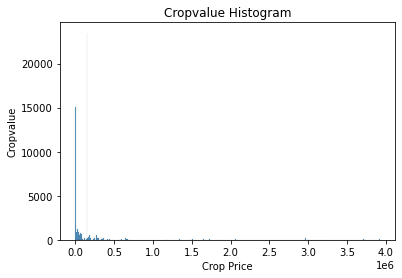

In [11]:
#histplot to display the distribution of crop _value
ax = sns.histplot(df_irishdata.crop_value)
ax.set(xlabel='Crop Price', ylabel='Cropvalue', title ='Cropvalue Histogram')

We can see from the above graph that the variable crop_value is slightly right or postively skewed

Text(0.5, 1.0, 'Box plot Crop Value by Crop Action')

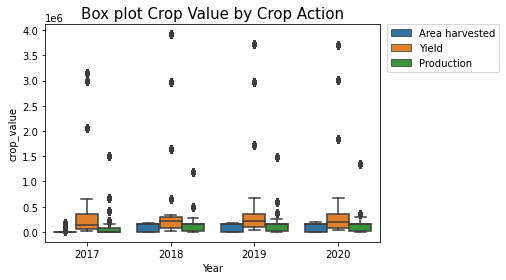

In [12]:
#Box plot to depict Box plot Crop Value by Crop Action
sns.boxplot(x = 'Year', y ='crop_value', data=df_irishdata, hue = 'crops_action')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Box plot Crop Value by Crop Action', fontsize=15)

# Ireland Annual mean variance plot

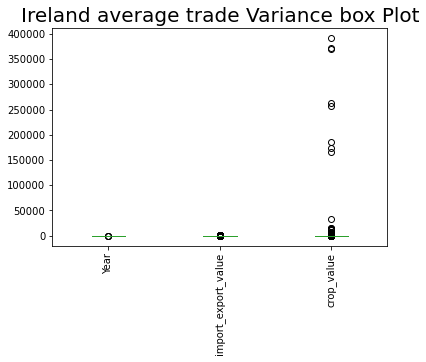

In [13]:
df_irishdata[['Year', 'import_export_value', 
                           'crop_value']].pct_change().plot(kind='box', rot=90)
plt.title("Ireland average trade Variance box Plot", fontsize=20);

# Ireland annual cropvalue and max airtemp variance plot

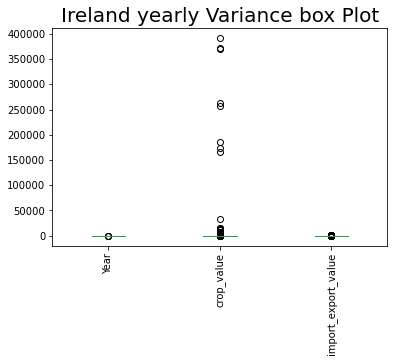

In [14]:
df_irishdata[['Year', 'crop_value', 
                           'import_export_value']].pct_change().plot(kind='box', rot=90)
plt.title("Ireland yearly Variance box Plot", fontsize=20);

# Using Chi-square test on a the IrishCrops dataset

In [15]:
import os
import pandas
df= pandas.read_csv("FAOSTAT_data_5-1-2022 (2).csv")
categorical_col = ['Domain', 'Area', 'Element', 'item', 'Unit']
print(categorical_col)

['Domain', 'Area', 'Element', 'item', 'Unit']


using the crosstab() function to create a contingency table of the two selected variables to work on ‘Element’ and ‘item’.

In [16]:
chisqt = pandas.crosstab(df.Domain, df.Unit, margins=True)
print(chisqt)

Unit                          0.1g/An  1000 Head  1000 No  100mg/An  Head  \
Domain                                                                      
Crops and livestock products       38         90        8         8   237   
All                                38         90        8         8   237   

Unit                          No/An   ha  hg/An  hg/ha  tonnes   All  
Domain                                                                
Crops and livestock products      8  470     68    294     908  2129  
All                               8  470     68    294     908  2129  


At last, we apply the chi2_contingency() function on the table and get the statistics, p-value and degree of freedom values

In [17]:
from scipy.stats import chi2_contingency 
import numpy as np
chisqt = pandas.crosstab(df.Domain, df.Unit, margins=True)
value = np.array([chisqt.iloc[0][0:10].values,
                  chisqt.iloc[1][0:10].values])
print(chi2_contingency(value)[0:3])

(0.0, 1.0, 9)


From above, 1.0 is the p-value, 0.0 is the statistical value and 9 is the degree of freedom. As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Domain’ and ‘Unit’ are independent of each other.

# Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

In [19]:
# Example of the Shapiro-Wilk Normality Tes
from scipy.stats import shapiro
year= [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.


value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution

# Shapiro-Wilk Test

In [20]:
# import useful library
import numpy as np
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import shapiro
from numpy.random import randn
  
seed(0)
# Create data
crops_action = poisson(5, 200)
  
# conduct the  Shapiro-Wilk Test
shapiro(crops_action)

ShapiroResult(statistic=0.966901957988739, pvalue=0.00011927181185455993)

Since in the above example, the p-value is 0.0001 which is less than the alpha(0.5) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution

# Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.


Assumptions

Observations in each sample are independent and identically distributed (iid). 

Observations in each sample are normally distributed. Observations in each sample have the same variance.


In [21]:
from scipy.stats import pearsonr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_action= [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(crop_value, crop_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


Interpretation

H0: the two samples are independent. 
    
H1: there is a dependency between the samples


# Spearman’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked

In [22]:
from scipy.stats import spearmanr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_measurement = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(crop_value, crop_measurement)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples

# D’Agostino’s K^2 Test - Normality Test

Tests whether a data sample has a Gaussian distribution.


In [24]:
from scipy.stats import normaltest
df_irish = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(df_irish)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution. 
    
H1: the sample does not have a Gaussian distribution.


# Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions

Observations used in the calculation of the contingency table are independent.

25 or more examples in each cell of the contingency table.


In [25]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
crop_value = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


We can see that the P - value for crop value is greater than 0.5 and is probably independant

# Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples.

# Parametric Statistical Hypothesis Tests

This section lists statistical tests that you can use to compare data samples


# Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.

Observations across each sample are paired.


In [26]:
df_irishdata

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0
...,...,...,...,...,...,...,...,...
57655,57655,2020,Ireland,tonnes,Wheat,Production,364920.0,8262.0
57656,57656,2020,Ireland,tonnes,Wheat,Production,364920.0,2099.0
57657,57657,2020,Ireland,tonnes,Wheat,Production,364920.0,646.0
57658,57658,2020,Ireland,tonnes,Wheat,Production,364920.0,174.0


In [27]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
import_export_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
year = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(import_export_value, year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


interpretation

H0: the means of the samples are equal.

H1: the means of the samples are unequal.


# We can see that the P value for Year is greater than 0.5 and is therefore of the same distribution

# We can see that the P Value for all test s above has not been greater than 0.5

# Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).  

Observations in each sample are normally distributed. 

Observations in each sample have the same variance


In [28]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
import_export_value= [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_value = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
crops_action = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(import_export_value, crop_value, crops_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


Interpretation

H0: the means of the samples are equal.

H1: one or more of the means of the samples are unequal.


# Nonparametric Statistical Hypothesis Tests

Tests whether the distributions of two independent samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked.


In [29]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
crop_measurement = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_type = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(crop_measurement, crop_type)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


Interpretation

H0: the distributions of both samples are equal.

H1: the distributions of both samples are not equal.

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.


# Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid). Observations in each sample can be ranked. Observations across each sample are paired.


In [30]:
#example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crops_action = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(crop_value, crops_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


Interpretation

H0: the distributions of both samples are equal.

H1: the distributions of both samples are not equal.


In [31]:
#checking the shape and size of the dataframe

print("Shape of the dataset is : ",df_irishdata.shape)
print("Size of the dataset is : ",df_irishdata.size)

Shape of the dataset is :  (57660, 8)
Size of the dataset is :  461280


In [32]:
#list the datatypes of all columns we can see there are alot of objects later I will change these to onehotencoding for the linear regression
df_irishdata.dtypes

Unnamed: 0               int64
Year                     int64
country                 object
crop_measurement        object
crops_type              object
crops_action            object
crop_value             float64
import_export_value    float64
dtype: object

# Plot Distribution of the Target variable/feature crop_value

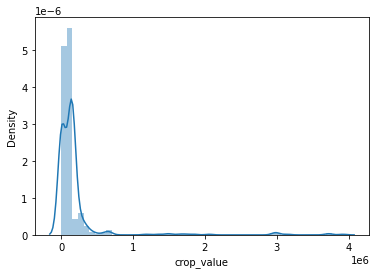

In [33]:
# plot distribution of crop_value target variable seaborn distplot
sns.distplot(df_irishdata['crop_value'])
plt.show()

The crop_value is not normally distributed the distribution is skewed left because it looks pulled out to the left

# Brazilian Dataset

# Descriptive Statistics for the Target features: crop value & consumervalue

In [35]:
#Reading in Brazilian Crops dataset from between 2010 to 2020 8 actions 10 crop measurements and 139 crop types
df_brazildata = pd.read_csv('df_brazilmodels.csv')
df_brazildata.head()

,Unnamed: 0,year,country,months,crop_measurement,crops_type,crops_action,crop_value,consumer_value
0,1464,2010,Brazil,January,tonnes,Chestnut,Production,5.333023e+06,3.559127
1,1471,2010,Brazil,August,tonnes,Chestnut,Production,5.333023e+06,4.098498
2,1465,2010,Brazil,February,tonnes,Chestnut,Production,5.333023e+06,4.271629
3,1470,2010,Brazil,July,tonnes,Chestnut,Production,5.333023e+06,4.338587
4,1469,2010,Brazil,June,tonnes,Chestnut,Production,5.333023e+06,5.074611


In [36]:
#Dropping ID and Source column from the data for outlier analysis
df_brazildata.drop(columns=["Unnamed: 0","country"],axis=1,inplace=True)
df_brazildata.dtypes

year                  int64
months               object
crop_measurement     object
crops_type           object
crops_action         object
crop_value          float64
consumer_value      float64
dtype: object

In [37]:
#inspect the dataframe for outliers will display the min,max mean and inner and outer quariles for all features
df_brazildata.describe()

,year,crop_value,consumer_value
count,83520.000000,8.352000e+04,83520.000000
mean,2014.975431,5.372101e+06,68.105087
std,3.151619,5.199071e+07,45.941999
min,2010.000000,9.000000e+00,-2.317125
25%,2012.000000,1.347600e+04,10.043639
50%,2015.000000,8.797600e+04,80.803340
75%,2018.000000,3.935035e+05,111.989600
max,2020.000000,7.685942e+08,141.626625


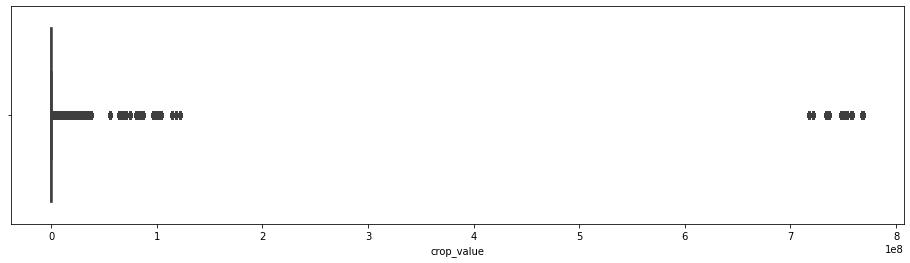

In [38]:
#boxplot for the target feature crop_value
plt.figure(figsize = (16,4))
sns.boxplot(x= df_brazildata['crop_value'])
plt.show()

In [39]:
#print the mean of the target feature
mean_cropvalue=  df_brazildata['crop_value'].mean()
print(mean_cropvalue)

5372100.747240936


In [40]:
#print the median of the target feature
median = df_brazildata['crop_value'].median()
print(median)

87976.0


In [41]:
#print the mode of the target feature
mode = df_brazildata['crop_value'].mode()
print(mode)

0    5.333023e+06
Name: crop_value, dtype: float64


[Text(0.5, 0, 'Crop Price'),
 Text(0, 0.5, 'Cropvalue'),
 Text(0.5, 1.0, 'Cropvalue Histogram')]

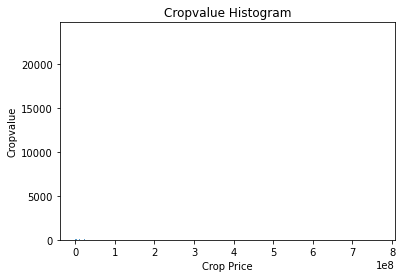

In [43]:
#histplot to display the distribution of crop _value
ax = sns.histplot(df_brazildata.crop_value)
ax.set(xlabel='Crop Price', ylabel='Cropvalue', title ='Cropvalue Histogram')

Text(0.5, 1.0, 'Box plot Crop Value by Crop Action')

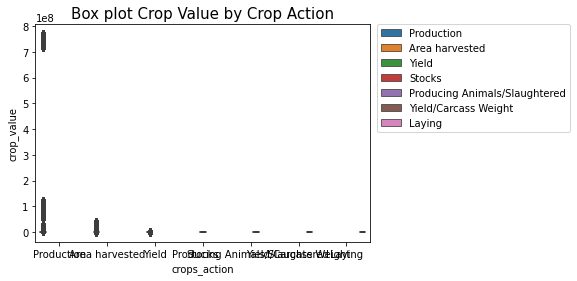

In [44]:
#Box plot to depict Box plot Crop Value by Crop Action
sns.boxplot(x = 'crops_action', y ='crop_value', data=df_brazildata, hue = 'crops_action')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Box plot Crop Value by Crop Action', fontsize=15)

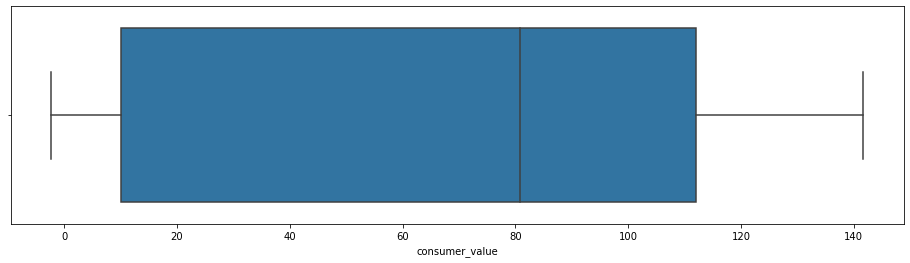

In [45]:
#boxplot for the feature rain
plt.figure(figsize = (16,4))
sns.boxplot(x= df_brazildata['consumer_value'])
plt.show()

In [46]:
#print the mean of the target feature
mean_consumervalue=  df_brazildata['consumer_value'].mean()
print(mean_consumervalue)

68.1050868260576


In [47]:
#print the median of the target feature
median = df_brazildata['consumer_value'].median()
print(median)

80.80334


In [48]:
#print the mode of the target feature
mode = df_brazildata['consumer_value'].mode()
print(mode)

0    72.17294
Name: consumer_value, dtype: float64


[Text(0.5, 0, 'Consumer Price'),
 Text(0, 0.5, 'consumervalue'),
 Text(0.5, 1.0, 'Consumervalue Histogram')]

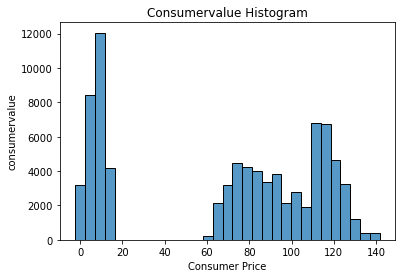

In [49]:
#histplot to display the distribution of consumer _value
ax = sns.histplot(df_brazildata.consumer_value)
ax.set(xlabel='Consumer Price', ylabel='consumervalue', title ='Consumervalue Histogram')

Text(0.5, 1.0, 'Box plot Consumer Value by Crop Action')

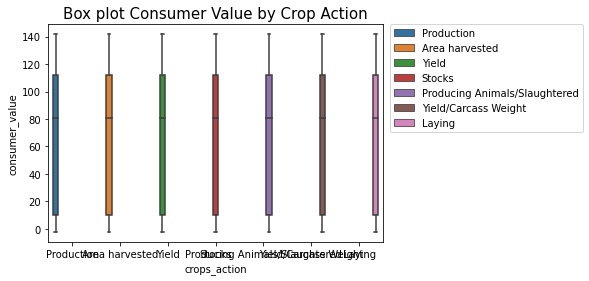

In [50]:
#Box plot to depict Box plot Crop Value by Crop Action
sns.boxplot(x = 'crops_action', y ='consumer_value', data=df_brazildata, hue = 'crops_action')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Box plot Consumer Value by Crop Action', fontsize=15)

# Shapiro-Wilk Test - Normality Test - Target crop_value

Tests whether a data sample has a Gaussian distribution. examines if a variable is normally distributed in a population


In [51]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution



# Shapiro-Wilk Test - Normality Test - Target Consumer_value

Tests whether a data sample has a Gaussian distribution. Examines if a variable is normally distributed in a population Crop Value Consumer Value Crops_action

In [52]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
consumer_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(consumer_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.


In [53]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
crop_type = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(crop_type)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


if the result is >0.05 the result is normal, the data significantly deviate from a normal distribution if <0.05


In [54]:
# import useful library
import numpy as np
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import shapiro
from numpy.random import randn
  
seed(0)
# Create data
crops_action = poisson(5, 200)
  
# conduct the  Shapiro-Wilk Test
shapiro(crops_action)

ShapiroResult(statistic=0.966901957988739, pvalue=0.00011927181185455993)

Since in the above example, the p-value is 0.0001 which is less than the alpha(0.5) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution

# Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

Crop_Value & Crop Action


Assumptions

    Observations in each sample are independent and identically distributed (iid).

    Observations in each sample are normally distributed.

    Observations in each sample have the same variance.

In [55]:
from scipy.stats import pearsonr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_action= [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(crop_value, crop_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples


# Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

Crop_Value & consumer_value


In [57]:
from scipy.stats import pearsonr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
consumer_value= [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(crop_value, consumer_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples


# Spearman’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked


In [59]:
from scipy.stats import spearmanr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_measurement = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(crop_value, crop_measurement)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples


# D’Agostino’s K^2 Test - Normality Test

Tests whether a data sample has a Gaussian distribution.


In [60]:
from scipy.stats import normaltest
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution


# Using Chi-square test on a df_brazil dataset on the categorical features

In [61]:
import os
import pandas

df = pandas.read_csv("FAOSTAT_brazil_5-1-2022(4).csv")
categorical_col = ['Domain', 'Area', 'Item', 'Element','Unit']
print(categorical_col)

['Domain', 'Area', 'Item', 'Element', 'Unit']


using the crosstab() function to create a contingency table of the two selected variables to work on ‘crops_type’ and ‘crops_action’.

In [62]:
chisqt = pandas.crosstab(df.Domain, df.Element, margins=True)
print(chisqt)

Element                       Area harvested  Laying  Milk Animals  \
Domain                                                               
Crops and livestock products             781      22            22   
All                                      781      22            22   

Element                       Producing Animals/Slaughtered  Production  \
Domain                                                                    
Crops and livestock products                            231        1467   
All                                                     231        1467   

Element                       Stocks  Yield  Yield/Carcass Weight   All  
Domain                                                                   
Crops and livestock products     143    844                    99  3609  
All                              143    844                    99  3609  
